## Projektinstruktioner

Du ska välja en av 5 uppgifter och försöka lösa problemet med hjälp av djupa neurala nätverk. Varje
uppgift innehåller ett dataset och en problemformulering. Du ska själva ta fram vilken typ av
modell som är lämplig för projektet, träna den, optimera hyperparametrar och utvärdera.

- Du får inte lägga till egen data i projektet, men du ska städa datan.
- Det är tillåtet med dataagumentering för att utöka ditt dataset.
- Du ska skapa en modell från grunden, transfer learning får inte användas.

### Krav för godkänt (G)
- Skapa en modell från grunden. Du ansvarar själv för städning av datan och uppdelning i träning, validering och testning.
**Frågor:**
- Motivera din modell, dess arkitektur och val av relevanta hyperparametrar.
- Har du använt någon databehandling? Varför?
- Utvärdera modellens prestanda.
- Är prestandan bra? Varför/ varför inte?
- Vad hade du kunnat göra för att förbättra den ytterligare?

### Krav för väl godkänt (VG)
- För VG ska du utvärdera modellen noggrannare och systematiskt optimera hyperparametrar.
**Frågor:**
- Testa olika hyperparametrar systematiskt.
- Vilken typ av fel gör modellen?
  - Gör den fel på vissa klasser? Gör den fel specifik typ av data? Annat?
  - Kan du göra något för att hantera vanliga fel modellen gör? (Med den data du har, att träna på mer data är inte ett godkänt svar)
- Finns det några begränsningar med modellen?
  - Exempelvis på grund av prestanda eller hur träningsdatan ser ut.

### Presentation
Förutom att lämna in en notebook ska du skapa en presentation (exempelvis en power point) där du ska
presentera ert problem, vad för modell du skapat och hur den presterar. Ni kommer presentera i
smågrupper.

- Presentationen ska vara 10-15 minuter samt 5-10 minuter till frågor.
- Det är obligatoriskt att presentera och vara med under alla presentationer i din grupp.
- Du får vara med och lyssna på andra grupper om du vill.

### Min valda uppgift - Motverka hatretorik

Denna uppgift innehåller hatiska texter riktad mot flera olika grupper och kan därmed vara jobbig för
vissa att genomföra.

På sociala medier och forum skrivs idag mycket hatiska texter, bpde mot personer och grupper. Oftast
bevakas sociala medier och forum av moderatorer, men det är ett tidskrävande arbete och hat sprids
snabbare än vad de hinner jobba. Genom att ha en modell som kan idetifiera denna typ av text så kan vi snabba på moderatorerna arbete och minska att hat sprids.

**Uppgift:** Skapa en modell som kan identifiera om en text är hatisk mot en specifik grupp (och vilken grupp). Det är några typer av hat som ligger i fokus, exempelvis hat baserat å sexalitet eller kön. 

Hat mot exempelvis en yrkesgrupp räknas inte som en hatisk text. 

Dataset: ca 4000 texter, om den är hatisk och i så fall mot vilken grupp.

In [180]:
import pandas as pd
import numpy as np
from labb_2_functions import *

pd.set_option('display.max_colwidth', None)

df = pd.read_csv("hate-text.csv")

In [181]:
# changes column names
df.columns = ['id', 'text', 'label', 'identity']

In [182]:
# re-use functions from RNN EDA
character_counter = character_counter_for_sentences(df["text"])
word_counter = word_counter_for_sentences(df["text"])

word_or_character_length(50, character_counter)
word_or_character_length(10, word_counter)
print("\n---LENGTH OF SENTENCES IN DATASET---")

print_metrics_for_characters_or_words("Characters", character_counter)
print_metrics_for_characters_or_words("Words", word_counter)


Rows that are ABOVE or EQUAL to 50 characters long: 1670
Rows that are BELOW 50 characters long: 2231

Rows that are ABOVE or EQUAL to 10 characters long: 1558
Rows that are BELOW 10 characters long: 2343

---LENGTH OF SENTENCES IN DATASET---
Median Length Characters: 46
Average Length Characters: 48.105613945142274
Smallest Length Characters: 11
Longest Length Characters: 104 

Median Length Words: 9
Average Length Words: 8.826454755190976
Smallest Length Words: 2
Longest Length Words: 20 



(None, None, None, None)

### Word and Character Distribution

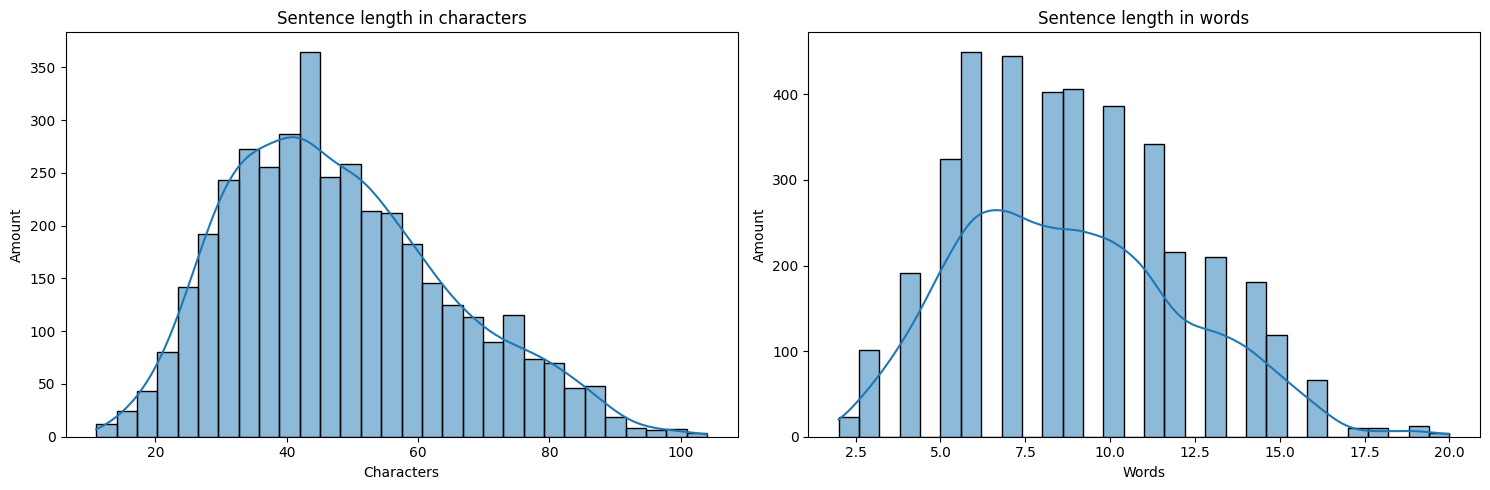

In [183]:
# Re-using more code from labb 2
texts = df["text"]
character_length = character_counter_for_sentences(texts)
word_length = word_counter_for_sentences(texts)

df["character_amount"] = character_length
df["word_amount"] = word_length

length_words_and_characters_histplot(df, bin=30)

### Identity Categories

In [184]:
df["identity"].unique()

array(['women', 'trans people', 'gay people', 'black people',
       'disabled people', 'Muslims', 'immigrants', nan], dtype=object)

### Null Values in DF

In [185]:
df.isnull().sum()

id                    0
text                  0
label                 0
identity            295
character_amount      0
word_amount           0
dtype: int64

In [186]:
pd.reset_option('display.max_rows')
df[df["identity"].isnull()]

,id,text,label,identity,character_amount,word_amount
1271,1272,"Fucking hell, what a day.",non-hateful,NaN,26,5
1272,1273,That's a great fucking idea.,non-hateful,NaN,29,5
1273,1274,No fucking way.,non-hateful,NaN,16,3
1274,1275,I'm so fucking excited.,non-hateful,NaN,24,4
1275,1276,Are you fucking kidding me?,non-hateful,NaN,27,5
...,...,...,...,...,...,...
3097,3098,Pro lifers should get the fuck out of our country.,non-hateful,NaN,51,10
3098,3099,Most gun dealers are seriously fucked in the head.,non-hateful,NaN,51,9
3099,3100,"By nature, corporate accountants are just shitty human beings.",non-hateful,NaN,63,9
3100,3101,Most real estate agents are absolute bastards.,non-hateful,NaN,47,7


### Identity Distribution

In [187]:
df["identity"].value_counts()

gay people         577
women              535
disabled people    510
Muslims            510
black people       504
trans people       485
immigrants         485
Name: identity, dtype: int64

### Label Distribution

In [188]:
df["label"].value_counts()

hateful        2659
non-hateful    1242
Name: label, dtype: int64

identity column is balanced well, however, label column is not.

#TODO data augmentation for label, keep in mind that identity column must still be balanced after label has had data augmented and added.

##### Must change all words with numbers in them because it'll most likely affect the sentiment analysis negatively otherwise, we'll receive inaccurate polarity and subjectivety scores.

In [189]:
# prints all rows with a word with number in them
pd.set_option('display.max_rows', None)
words_with_numbers_validation = df["text"][df["text"].str.contains(r'\d')].index
words_with_numbers = df["text"][df["text"].str.contains(r'\d')]
# split each row into a list of words
words_with_numbers = words_with_numbers.str.split()

print(words_with_numbers)

# find all words that contain a number in each list
word_with_number_list = []

for word_list in words_with_numbers: # loops through list och list
    for word in word_list: # loops through elements in each list
        if any(char.isdigit() for char in word):
            word_with_number_list.append(word)

        # only keep unique words in list
        word_with_number_list_unique = np.unique(word_with_number_list)
        word_with_number_list_unique = word_with_number_list_unique.tolist()

number_to_letter_dict = {
    "1": "i",
    "3": "e",
    "4": "a",
    "7": "t",
    "0": "o"
}

2811               [It's, disheartening, to, still, see, people, call, for, the, death, of, women, in, 2020.]
2812       [It's, disheartening, to, still, see, people, call, for, the, death, of, trans, people, in, 2020.]
2813         [It's, disheartening, to, still, see, people, call, for, the, death, of, gay, people, in, 2020.]
2814       [It's, disheartening, to, still, see, people, call, for, the, death, of, black, people, in, 2020.]
2815    [It's, disheartening, to, still, see, people, call, for, the, death, of, disabled, people, in, 2020.]
2816             [It's, disheartening, to, still, see, people, call, for, the, death, of, Muslims, in, 2020.]
2817          [It's, disheartening, to, still, see, people, call, for, the, death, of, immigrants, in, 2020.]
3728                                                                                        [I, h4te, women.]
3729                                                                                [I, h4te, trans, people.]
3730      

In [190]:
pattern = '|'.join(number_to_letter_dict.keys())

# Replace each occurrence of the pattern with the corresponding value from the dictionary
df['text'] = df['text'].str.replace(pattern, lambda x: number_to_letter_dict[x.group()], regex=True)

# apply index of rows that had words with numbers in them to check if lambda works as expected 
df["text"].loc[words_with_numbers_validation]

2811              It's disheartening to still see people call for the death of women in 2o2o. 
2812       It's disheartening to still see people call for the death of trans people in 2o2o. 
2813         It's disheartening to still see people call for the death of gay people in 2o2o. 
2814       It's disheartening to still see people call for the death of black people in 2o2o. 
2815    It's disheartening to still see people call for the death of disabled people in 2o2o. 
2816            It's disheartening to still see people call for the death of Muslims in 2o2o. 
2817         It's disheartening to still see people call for the death of immigrants in 2o2o. 
3728                                                                            I hate women. 
3729                                                                     I hate trans people. 
3730                                                                       I hate gay people. 
3731                                              

### Sentiment Analysis

In [191]:
from textblob import TextBlob
df_texts = df["text"]

for text in df_texts:
    blob = TextBlob(text)
    print(f"Text: {text}, Polarity: {blob.sentiment.polarity}, Subjectivity: {blob.sentiment.subjectivity}")

Text: I hate women. , Polarity: -0.8, Subjectivity: 0.9
Text: I hate trans people. , Polarity: -0.8, Subjectivity: 0.9
Text: I hate gay people. , Polarity: -0.19166666666666668, Subjectivity: 0.7416666666666667
Text: I hate black people. , Polarity: -0.48333333333333334, Subjectivity: 0.6666666666666667
Text: I hate disabled people. , Polarity: -0.5, Subjectivity: 0.6
Text: I hate Muslims. , Polarity: -0.8, Subjectivity: 0.9
Text: I hate immigrants. , Polarity: -0.8, Subjectivity: 0.9
Text: I really can't stand women like you. , Polarity: 0.2, Subjectivity: 0.2
Text: I really can't stand trans people like you. , Polarity: 0.2, Subjectivity: 0.2
Text: I really can't stand gay people like you. , Polarity: 0.30833333333333335, Subjectivity: 0.3916666666666667
Text: I really can't stand black people like you. , Polarity: 0.016666666666666677, Subjectivity: 0.31666666666666665
Text: I really can't stand disabled people like you. , Polarity: 0.0, Subjectivity: 0.25
Text: I really can't stand

### Sentiment Analysis Evaluation:
Thinking that changing all numbers to letters in the words that were affected seemed to do nothing. I still think that the scoring is very off and sentences that are seemingly just as negative score differently. In other words: I can't use this information for anything useful.